<a href="https://colab.research.google.com/github/VarunShivaram56/colab_aiml_lab/blob/main/aiml_lab_1_051124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 1: Generate Sample Data
# Assuming 100 students with random interests
np.random.seed(0)
data = {
    "Student_ID": range(1, 101),
    "Preferred_Subject": np.random.choice(["Machine Learning", "Data Science", "AI", "Data Analytics"], 100),
    "Learning_Style": np.random.choice(["Visual", "Auditory", "Kinesthetic"], 100),
    "Preferred_Language": np.random.choice(["Python", "R", "Java", "C++"], 100),
    "Study_Preference": np.random.choice(["Group Study", "Solo Study"], 100),
    "Likes_ML": np.random.choice([0, 1], 100)  # 1 if they like Machine Learning, else 0
}

df = pd.DataFrame(data)


In [5]:
# Step 2: Data Preprocessing
# Encoding categorical features
encoder = LabelEncoder()
df['Preferred_Subject'] = encoder.fit_transform(df['Preferred_Subject'])
df['Learning_Style'] = encoder.fit_transform(df['Learning_Style'])
df['Preferred_Language'] = encoder.fit_transform(df['Preferred_Language'])
df['Study_Preference'] = encoder.fit_transform(df['Study_Preference'])


In [6]:
# Step 3: Clustering to identify patterns in interests
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Preferred_Subject', 'Learning_Style', 'Preferred_Language', 'Study_Preference']])


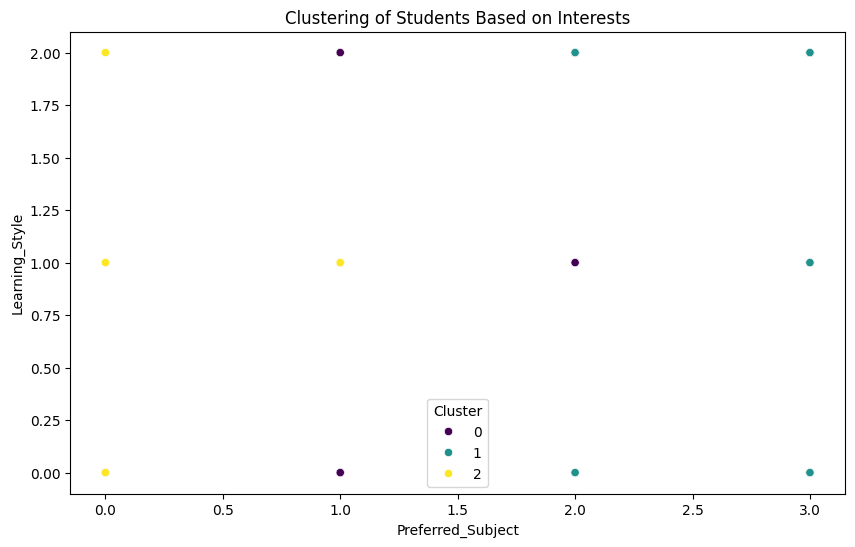

In [7]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Preferred_Subject', y='Learning_Style', hue='Cluster', palette='viridis')
plt.title("Clustering of Students Based on Interests")
plt.show()

In [8]:
# Step 4: Feature Importance using Decision Tree to predict "Likes_ML"
X = df[['Preferred_Subject', 'Learning_Style', 'Preferred_Language', 'Study_Preference']]
y = df['Likes_ML']


In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Calculate accuracy
y_pred = clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.4


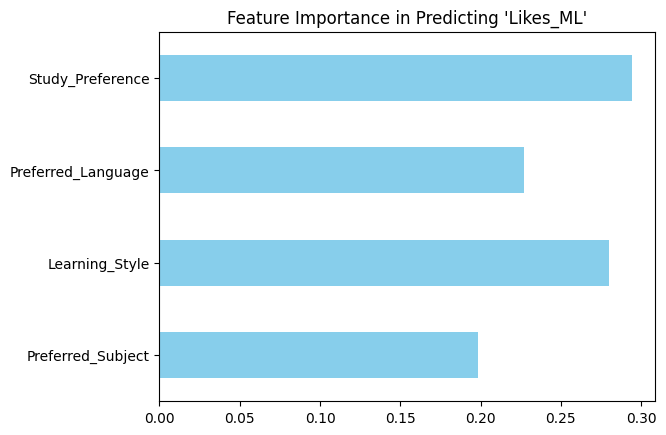

Feature Importances:
 Preferred_Subject     0.198648
Learning_Style        0.279855
Preferred_Language    0.227302
Study_Preference      0.294195
dtype: float64


In [13]:
#Feature importance analysis
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance in Predicting 'Likes_ML'")
plt.show()

print("Feature Importances:\n", feature_importances)